In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from scipy.stats import kruskal
import scikit_posthocs as sp

In [13]:
path = Path('../../data/results/experiment4')

Statistics=73.620, p=0.000
              1             2             3             4
1 -1.000000e+00  1.620460e-23  1.174659e-02  3.013234e-04
2  1.620460e-23 -1.000000e+00  5.146672e-17  3.023608e-14
3  1.174659e-02  5.146672e-17 -1.000000e+00  2.240537e-01
4  3.013234e-04  3.023608e-14  2.240537e-01 -1.000000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1a1f927c50>,
 <matplotlib.colorbar.ColorbarBase at 0x1a1fa75630>)

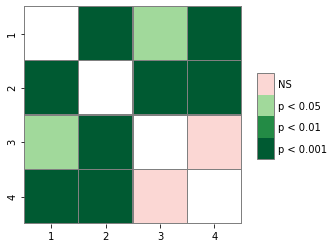

In [14]:
# fitness plots
no_nn = pd.read_csv(path/'no_nn_mof.csv')
nn_normal_rand = pd.read_csv(path/'nn-normal-random_mof.csv')
nn_dist_rand = pd.read_csv(path/'nn-distribution-random_mof.csv')
nn_dropout_rand= pd.read_csv(path/'nn-dropout-random_mof.csv')

x=np.array([no_nn.mof, nn_normal_rand.mof, nn_dist_rand.mof,nn_dropout_rand.mof])

stat, p = kruskal(no_nn,nn_normal_rand,nn_dist_rand,nn_dropout_rand)
pc=sp.posthoc_conover(x, p_adjust='holm', val_col='values', group_col='groups')
print('Statistics=%.3f, p=%.3f' % (stat, p))
print(pc)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)